<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / Assingment 3*

---
# Neural Network Framework (Keras)


## 케라스 라이브러리를 사용하여 Multi-Layer Perceptron 모델을 CIFAR100 데이터에 적용해보세요.

- 케라스에서 필요한 모델 및 레이어의 유형(출력층 재설정 필요)을 가져오십시오.
- 적합한 활성함수 사용
- 모델 컴파일
- 피쳐 엔지니어링 후 어느 모델이 새로운 피쳐로 인해 정확도가 더 높아졌는가?

In [ ]:
##### Your Code Here #####
from tensorflow.keras.datasets import cifar100

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 9s 0us/step


In [ ]:
##### Your Code Here #####

## Stretch Goals:

- 하이퍼 파라미터 튜닝을 사용하여 모델의 정확도를 최대한 높여보세요.
- 교차 검증(CV) 기법을 사용하여 모델과 조금 더 일관된 결과를 얻어보세요.
- 아직 이론을 배우진 않았지만, 케라스의 CNN 예제를 파일만 입력할 수 있다면 사용해볼 수 있는 코드를 작성해 드렸습니다. 파라미터에 대한 코드를 찾아서 변환하는 것이기 때문에 CNN이라고 해서 어려울 것은 없습니다. 아직 원리를 모르지만, 두개의 데이터 셋 중 하나를 선택(cifar100 또는 fashion-MNIST)해서 CNN 모델을 구축하고 파라미터 튜닝을 하면서 결과를 비교해 보십시오. 이론적인 도움이 필요하다고 생각되면, Warmup 영상을 확인하시면 도움을 받을 수 있을 것입니다. 


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


batch_size = 128
num_classes = 10
epochs = 12

In [ ]:
img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_test, y_test),
                    epochs=epochs, verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/12
468/468 - 15s - loss: 1.1359 - accuracy: 0.6176 - val_loss: 0.1900 - val_accuracy: 0.9483
Epoch 2/12
468/468 - 15s - loss: 0.6220 - accuracy: 0.7999 - val_loss: 0.1815 - val_accuracy: 0.9430
Epoch 3/12
468/468 - 15s - loss: 0.5039 - accuracy: 0.8399 - val_loss: 0.1264 - val_accuracy: 0.9610
Epoch 4/12
468/468 - 15s - loss: 0.4325 - accuracy: 0.8668 - val_loss: 0.1135 - val_accuracy: 0.9644
Epoch 5/12
468/468 - 15s - loss: 0.3910 - accuracy: 0.8799 - val_loss: 0.0894 - val_accuracy: 0.9732
Epoch 6/12
468/468 - 15s - loss: 0.3556 - accuracy: 0.8917 - val_loss: 0.0792 - val_accuracy: 0.9751
Epoch 7/12
468/468 - 15s - loss: 0.3337 - accuracy: 0.8982 - val_loss: 0.0872 - val_accuracy: 0.9722
Epoch 8/12
468/468 - 15s - loss: 0.3173 - accuracy: 0.9034 - val_loss: 0.1064 - val_accuracy: 0.9664
Epoch 9/12
468/468 - 15s - loss: 0.2979 - accuracy: 0.9108 - val_loss: 0.0699 - val_accuracy: 0.9769
Epoch 10/12
468

In [ ]:
score = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


model.save('/content/drive/Colab notebooks/section4/sprint2/model.h5')

313/313 - 5s - loss: 0.1695 - accuracy: 0.9573
Test loss: 0.1694931834936142
Test accuracy: 0.9573000073432922


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 여러분의 이미지를 입력해야 합니다. 
# 구글 드라이브의 연동을 활용해보세요.
!ls "drive/MyDrive/.../test4.jpg"

ds-cs-N421a.ipynb	  ds-cs-N422-Lecture.ipynb  ds-cs-N424a.ipynb
ds-cs-N421-Lecture.ipynb  ds-cs-N423a.ipynb	    ds-cs-N424-Lecture.ipynb
ds-cs-N422a.ipynb	  ds-cs-N423-Lecture.ipynb  test4.jpg


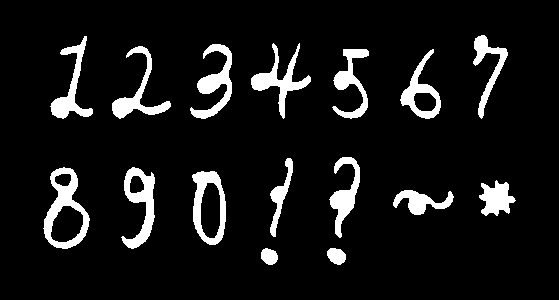

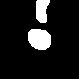

7


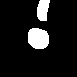

2


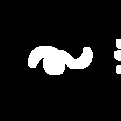

2


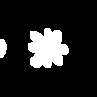

3


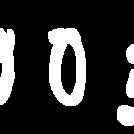

0


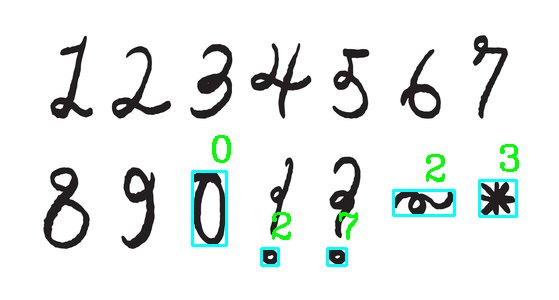

-1

In [ ]:
import cv2 as cv
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow

# 여러분의 이미지의 위치를 입력해야 합니다. 
img_color = cv.imread("drive/MyDrive/.../test4.jpg", cv.IMREAD_COLOR)
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)


ret,img_binary = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

kernel = cv.getStructuringElement( cv.MORPH_RECT, ( 5, 5 ) )
img_binary = cv.morphologyEx(img_binary, cv. MORPH_CLOSE, kernel)

cv2_imshow(img_binary)

contours, hierarchy = cv.findContours(img_binary, cv.RETR_EXTERNAL, 
                        cv.CHAIN_APPROX_SIMPLE)

for contour in contours[0:10]:

    x, y, w, h = cv.boundingRect(contour)

    length = max(w, h) + 60
    img_digit = np.zeros((length, length, 1),np.uint8)

    new_x,new_y = x-(length - w)//2, y-(length - h)//2


    img_digit = img_binary[new_y:new_y+length, new_x:new_x+length]

    kernel = np.ones((5, 5), np.uint8)
    img_digit = cv.morphologyEx(img_digit, cv.MORPH_DILATE, kernel)

    cv2_imshow(img_digit)
    # cv.waitKey(0)

    model = load_model('model.h5')

    img_digit = cv.resize(img_digit, (28, 28), interpolation=cv.INTER_AREA)

    img_digit = img_digit / 255.0

    img_input = img_digit.reshape(1, 28, 28, 1)
    predictions = model.predict(img_input)


    number = np.argmax(predictions)
    print(number)

    cv.rectangle(img_color, (x, y), (x+w, y+h), (255, 255, 0), 2)


    location = (x + int(w *0.5), y - 10)
    font = cv.FONT_HERSHEY_COMPLEX  
    fontScale = 1.2
    cv.putText(img_color, str(number), location, font, fontScale, (0,255,0), 2)
    

    cv2_imshow(img_digit)
    # cv.waitKey(0)
    

cv2_imshow(img_color)
cv.waitKey(0)